In this notebook, we use scikit-learn's gradient boosting regression to predict the popularity of online news. 

A popularity score for a news website is quantified by how many "shares" in the social network does that news article generate.

The task here is to predict the popularity score, given the features of the news article. 

The data set can be downloaded from the UCI repository:
https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity


In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sbn
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor


import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

pd.options.display.max_columns = 100

In [2]:
colnames = ['url', 
            'timedelta', 
            'n_tokens_title', 
            'n_tokens_content', 
            'n_unique_tokens', 
            'n_non_stop_words', 
            'n_non_stop_unique_tokens', 
            'num_hrefs', 
            'num_self_hrefs', 
            'num_imgs', 
            'num_videos', 
            'average_token_length', 
            'num_keywords', 
            'data_channel_is_lifestyle', 
            'data_channel_is_entertainment', 
            'data_channel_is_bus', 
            'data_channel_is_socmed', 
            'data_channel_is_tech', 
            'data_channel_is_world', 
            'kw_min_min', 
            'kw_max_min', 
            'kw_avg_min', 
            'kw_min_max', 
            'kw_max_max', 
            'kw_avg_max', 
            'kw_min_avg', 
            'kw_max_avg', 
            'kw_avg_avg', 
            'self_reference_min_shares', 
            'self_reference_max_shares', 
            'self_reference_avg_sharess',
            'weekday_is_monday', 
            'weekday_is_tuesday', 
            'weekday_is_wednesday', 
            'weekday_is_thursday',
            'weekday_is_friday', 
            'weekday_is_saturday', 
            'weekday_is_sunday', 
            'is_weekend',
            'LDA_00', 
            'LDA_01', 
            'LDA_02', 
            'LDA_03', 
            'LDA_04', 
            'global_subjectivity', 
            'global_sentiment_polarity', 
            'global_rate_positive_words', 
            'global_rate_negative_words',
            'rate_positive_words', 
            'rate_negative_words', 
            'avg_positive_polarity', 
            'min_positive_polarity', 
            'max_positive_polarity', 
            'avg_negative_polarity', 
            'min_negative_polarity', 
            'max_negative_polarity', 
            'title_subjectivity', 
            'title_sentiment_polarity',
            'abs_title_subjectivity', 
            'abs_title_sentiment_polarity', 
            'shares']


In [4]:
len(colnames)

61

In [3]:
data = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv', names=colnames, skiprows=1)
features = colnames[2:-1]
target = colnames[-1]

In [4]:
data.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


First we check the distribution of the target. As can be seen from the plots below, we see an obvious long-tail phenomena: most of the websites have low scores, but some rare websites can generate tremendous popularity. 

In light of this phenomena, when doing the regression, I chose to log-transform the target so that the regression is on the features and the log(shares). 

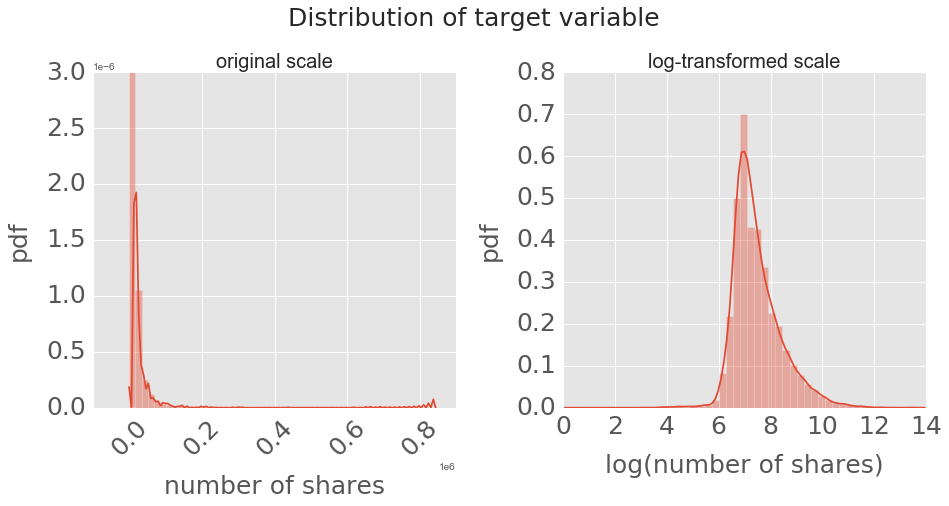

In [43]:
FONTSIZE = 25
plt.close('all')
fig = plt.figure(figsize=(13,7))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax = ax = plt.subplot(gs[0, 0])    
sbn.distplot(data[target], ax=ax) 
ax.set_xlabel('number of shares', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('pdf', fontsize=FONTSIZE, labelpad=15)
ax.set_ylim(0, 0.000003)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(45)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)        
ax.set_title('original scale', fontsize=0.8*FONTSIZE)


ax = ax = plt.subplot(gs[0, 1])
ax = sbn.distplot(np.log(data[target]), ax=ax) 
ax.set_xlabel('log(number of shares)', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('pdf', fontsize=FONTSIZE, labelpad=15)
ax.set_xlim(0)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)        
ax.set_title('log-transformed scale', fontsize=0.8*FONTSIZE)

plt.tight_layout(pad=0, w_pad=2.0, h_pad=1.0)  
fig.suptitle('Distribution of target variable', fontsize=FONTSIZE)
plt.subplots_adjust(top=0.85)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.25)

In [6]:
X_train.shape, X_test.shape

((29733, 58), (9911, 58))

Below we use sciki-learn's random search to find the best hyper-parameters, for a given fixed number of trees.

Once we figure out the best hyper-parameters, we use this set of parameters to train a new GBM with more number of trees. 


In [7]:
gbm = GradientBoostingRegressor(n_estimators=300)

param_dists = {'max_depth': [4, 8, 10], 
               'learning_rate': [0.001, 0.003, 0.01, 0.03], 
               'subsample': [0.4, 0.6, 0.8], 
               'max_features': [None, 'auto']}

n_iter_search = 15
random_search = RandomizedSearchCV(gbm, param_distributions=param_dists, n_iter=n_iter_search)

start_time = datetime.datetime.now()
random_search.fit(X_train, np.log(y_train))
elapsed_time = datetime.datetime.now() - start_time
print(elapsed_time)
gbm = random_search.best_estimator_

1:16:58.538757


In [10]:
best_params = random_search.best_params_
best_params['n_estimators'] = 10000

In [11]:
best_params

{'learning_rate': 0.03,
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 10000,
 'subsample': 0.6}

In [12]:
start_time = datetime.datetime.now()
best_gbm = GradientBoostingRegressor(**best_params)
best_gbm.fit(X_train, np.log(y_train))
elapsed_time = datetime.datetime.now() - start_time
print(elapsed_time)

0:16:22.295018


In [13]:
test_error = np.zeros(best_gbm.n_estimators)
for i, pred in enumerate(best_gbm.staged_predict(X_test)):
    test_error[i] = gbm.loss_(np.log(y_test), pred)
    
idx = np.arange(1, best_gbm.n_estimators+1)  

best_number_of_trees = np.argmin(test_error) + 1

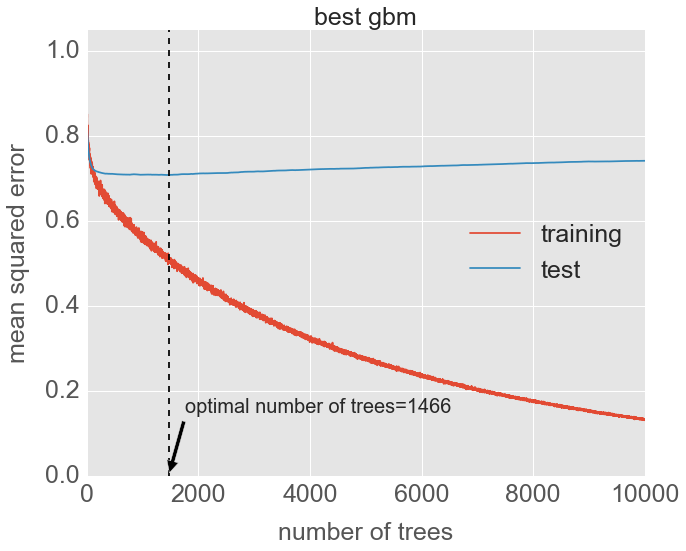

In [14]:
FONTSIZE=25
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10, 8))
p_train, = ax.plot(idx, best_gbm.train_score_)
p_test, = ax.plot(idx, test_error)
lowest_test_error, = ax.plot([best_number_of_trees-1, best_number_of_trees-1], 
                             [0, 20], linestyle='--', color='k')
ax.set_xlabel('number of trees', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('mean squared error', fontsize=FONTSIZE, labelpad=15)
ax.set_xlim(0, best_gbm.n_estimators+2)
ax.set_ylim(0, 1.05)                                         
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
l = plt.legend((p_train, p_test), ('training', 'test'), fontsize=FONTSIZE, loc=7)
ax.set_title('best gbm', fontsize=FONTSIZE)

ax.annotate('optimal number of trees={0:}'.format(best_number_of_trees), 
            xy=(best_number_of_trees-1, 0), xytext=(best_number_of_trees+300, 0.15),
            fontsize=FONTSIZE*0.8,
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


Note that unlinke RandomForest, GBM will overfit when the number of trees increases. As the above plot shows, as we increase the number of trees, the trainig error keeps decreasing, while the test error begins to increase after some point. The optimal number of trees is determined by argmin(test_error).